# **Decision Tree for Classification**

**Importing Libraries For Classification And Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

**Importing the Dataset**

In [2]:
dataset = pd.read_csv("bill_authentication.csv")

In [ ]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Feature Selection**

In [3]:
#split dataset in features and target variable
X = dataset.drop('Class', axis=1)
y = dataset['Class']
feature_cols=['Variance','Skewness','Curtosis','Entropy']

**Splitting Data**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Building Decision Tree Model**

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

**Evaluating Model** 

In [6]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9854368932038835


In [7]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[229   0]
 [  6 177]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       229
           1       1.00      0.97      0.98       183

    accuracy                           0.99       412
   macro avg       0.99      0.98      0.99       412
weighted avg       0.99      0.99      0.99       412



**Visualizing Decision Trees**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


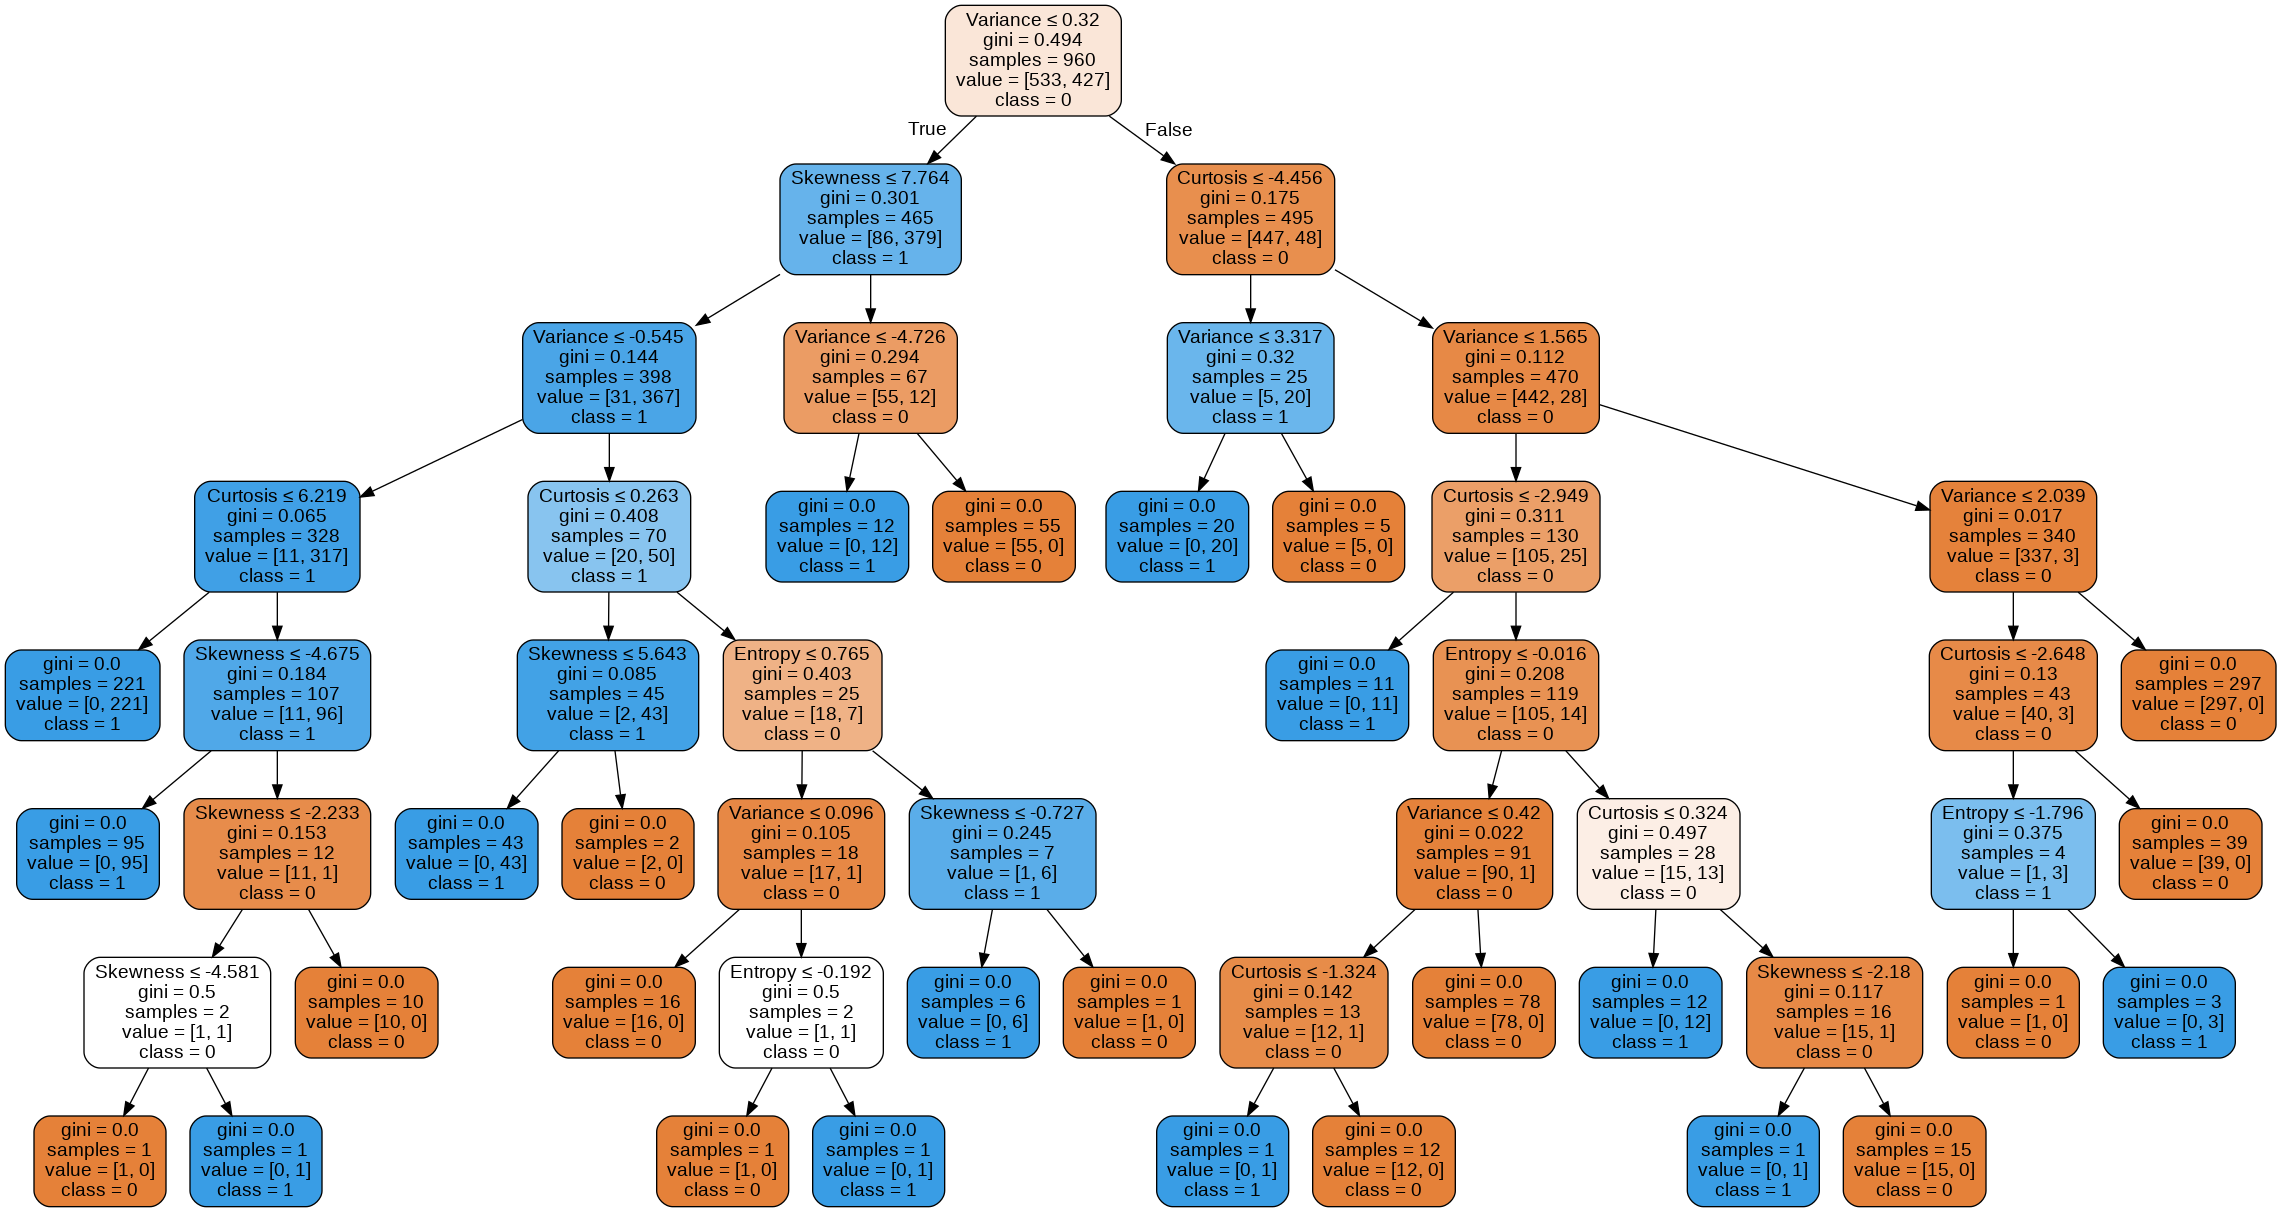

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bill_authentication.png')
Image(graph.create_png())

# **Decision Tree for Regression**

In [9]:
# load dataset
dataset2 = pd.read_csv('petrol_consumption.csv')

In [10]:
dataset2.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


**Feature Selection**

In [11]:
X2 = dataset2.drop('Petrol_Consumption', axis=1)
y2 = dataset2['Petrol_Consumption']
feature_cols=['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']

**Splitting Data**

In [12]:
# Split dataset into training set and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

**Building Decision Tree Model**

In [31]:

# Create Decision Tree Regression object
regressor = DecisionTreeRegressor(random_state=0)
# Train Decision Tree Regression
regressor.fit(X_train2, y_train2)
#Predict the response for test dataset
y_pred2 = regressor.predict(X_test2)

In [25]:
df=pd.DataFrame({'Actual':y_test2, 'Predicted':y_pred2})
df

,Actual,Predicted
27,631,603.0
40,587,610.0
26,577,574.0
43,591,714.0
24,460,510.0
37,704,566.0
12,525,471.0
19,640,865.0
4,410,510.0
25,566,541.0


**Evaluating Model**

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

Mean Absolute Error: 82.93333333333334
Mean Squared Error: 9976.0
Root Mean Squared Error: 99.87992791347018


**Visualizing Decision Trees**

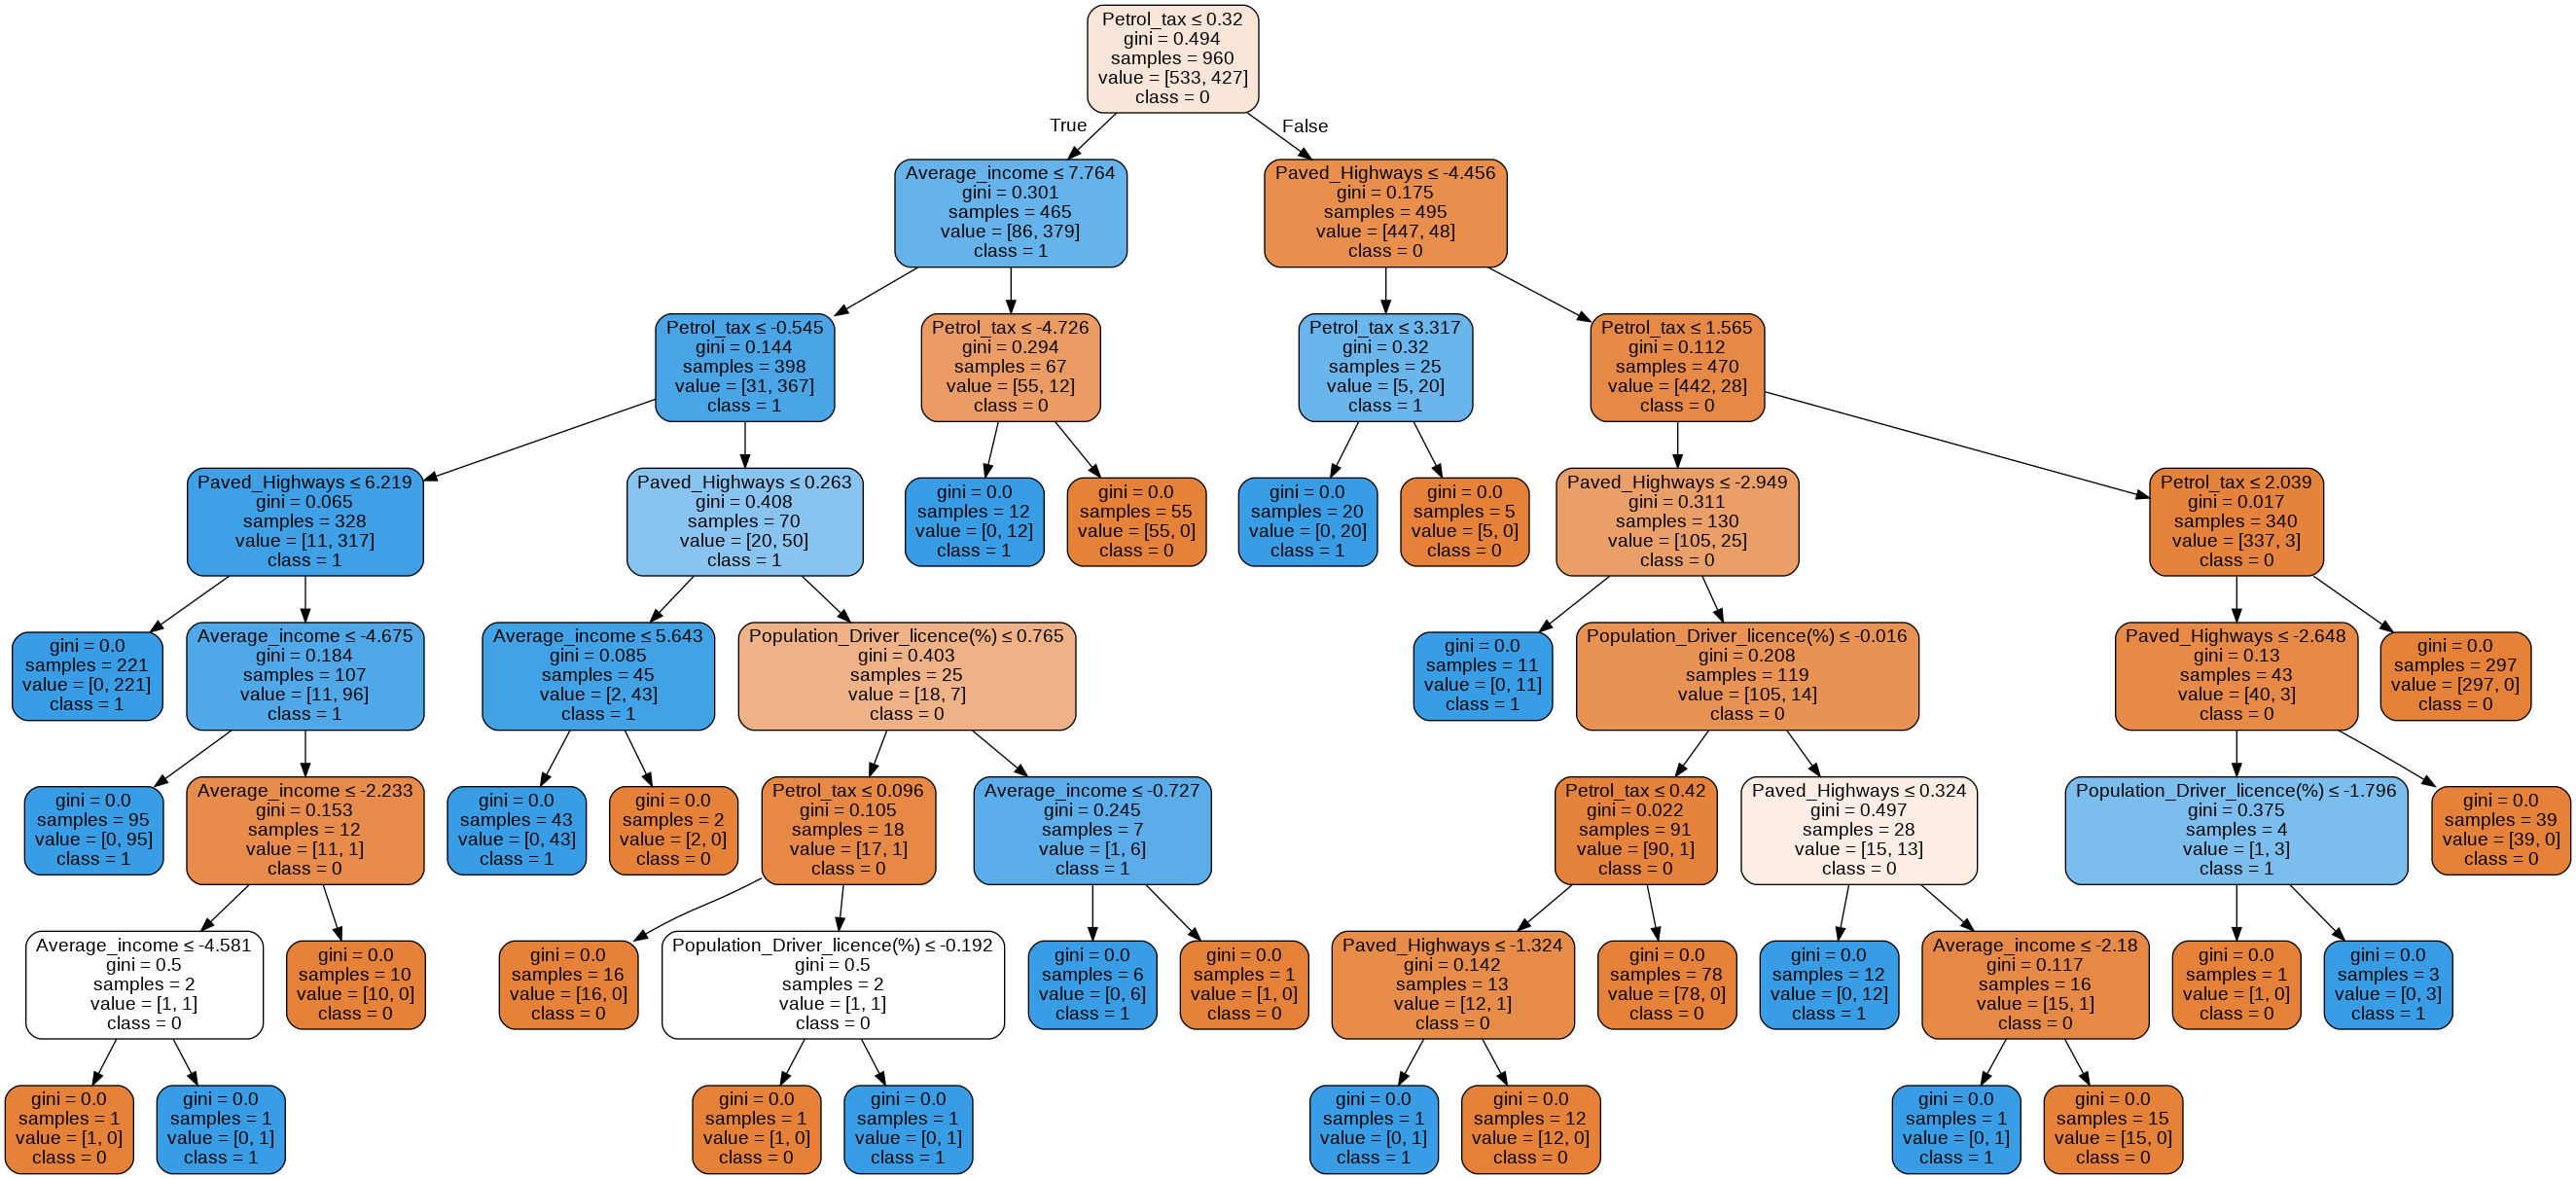

In [37]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('petrol_consumption.png')
Image(graph.create_png())